In [1]:
import zipfile

# Replace with the actual path to your ZIP file
zip_path = "C:/Users/singh/Downloads/twitter_training.csv.zip"
extract_path = "C:/Users/singh/Downloads/twitter_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [4]:
import pandas as pd

# Load the extracted CSV (adjust filename if different)
file_path = "C:/Users/singh/Downloads/twitter_data/twitter_training.csv"

# Try different encodings if utf-8 fails
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
print(df.columns)



Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [7]:
!pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 409.4 kB/s eta 0:00:03
   ------------- -------------------------- 0.5/1.5 MB 409.4 kB/s eta 0:00:03
   ------------- -------------------------- 0.5/1.5 MB 409.4 kB/s eta 0:00:03
   ------------- -------------------------- 0.5/1.5 MB 409.4 kB/s eta 0:00:03
   -------------------- ------------------- 0.8/1.5 MB 347.5 kB/s eta 0:00:03
   -------------------- ------------------- 0.8/1.5 MB 347

In [9]:
print(df.columns)


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [11]:
print(df.columns)
print(df.head())


Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [12]:
import pandas as pd

file_path = "C:/Users/singh/Downloads/twitter_data/twitter_training.csv"

# Load the data without headers
df = pd.read_csv(file_path, header=None, encoding='ISO-8859-1')

# Set the correct column names
df.columns = ['tweet_id', 'entity', 'original_sentiment', 'text']

# Preview
df.head()


,tweet_id,entity,original_sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Compute compound score
df['compound'] = df['text'].apply(lambda t: sia.polarity_scores(str(t))['compound'])

# Categorize sentiment based on compound score
df['vader_sentiment'] = df['compound'].apply(
    lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral'
)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\singh\AppData\Local\Temp\ipykernel_24544\2414880274.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vader_sentiment', data=df, palette='coolwarm')


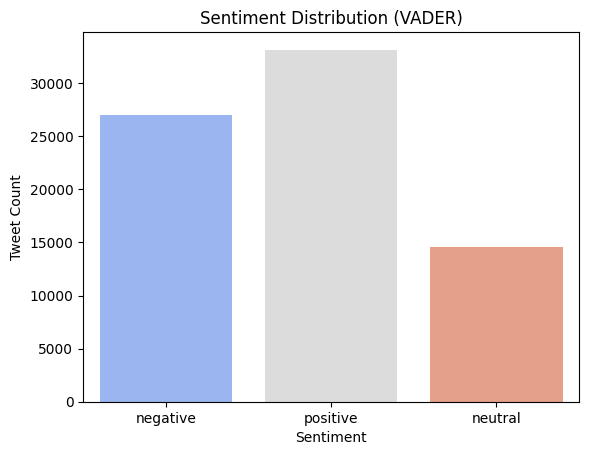

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='vader_sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Distribution (VADER)")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


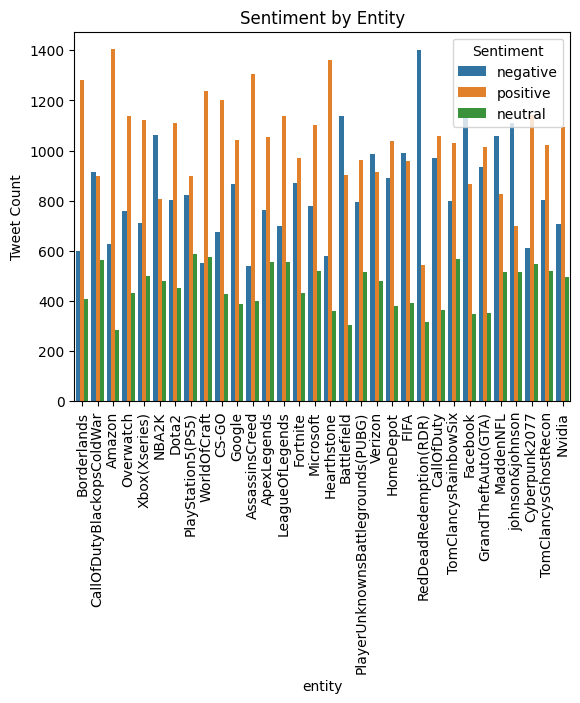

In [16]:
sns.countplot(data=df, x='entity', hue='vader_sentiment')
plt.title("Sentiment by Entity")
plt.xticks(rotation=90)
plt.ylabel("Tweet Count")
plt.legend(title="Sentiment")
plt.show()
